In [1]:
from sklearn import datasets
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from yellowbrick.cluster import SilhouetteVisualizer, KElbowVisualizer

Let's take a toy example, and find the error vs number of groups (K) for K-means algorithm. 
Let's use yellowbrick which is a plug&play lybrary to visualize this.

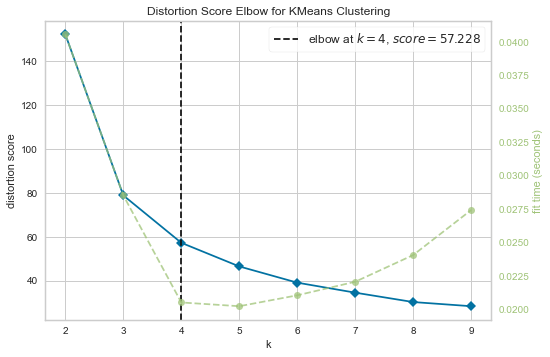

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [2]:
# Load the IRIS dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Instantiate clustering model
km = KMeans(random_state=42)
# Instantiate visualizer
visualizer = KElbowVisualizer(km, k=(2,10))
 
visualizer.fit(X) # Fit the data to the visualizer
visualizer.show() # Finalize and render the figure

Usualy, there is an *"elbow"* shap, in which adding additional groups (centroids) doesn't give significent inforamtion compare to the previous devisions. Means that the main division were already foound in the previouse K groups. 

## So, how do we find ‘K’ in K-means, in cases that this elbow can't be diagnosed sharply?
For such cases, we can use Silhouette score.

The value of the Silhouette score ranges from -1 to 1. 
Following is the interpretation of the Silhouette score.

    1: Points are perfectly assigned in a cluster and clusters are easily distinguishable.
    0: Clusters are overlapping.
    -1: Points are wrongly assigned in a cluster.

# Silhouette Score = (b-a)/max(a,b)

    a = average intra-cluster distance i.e the average distance between each point within a cluster.
    b = average inter-cluster distance i.e the average distance between all clusters


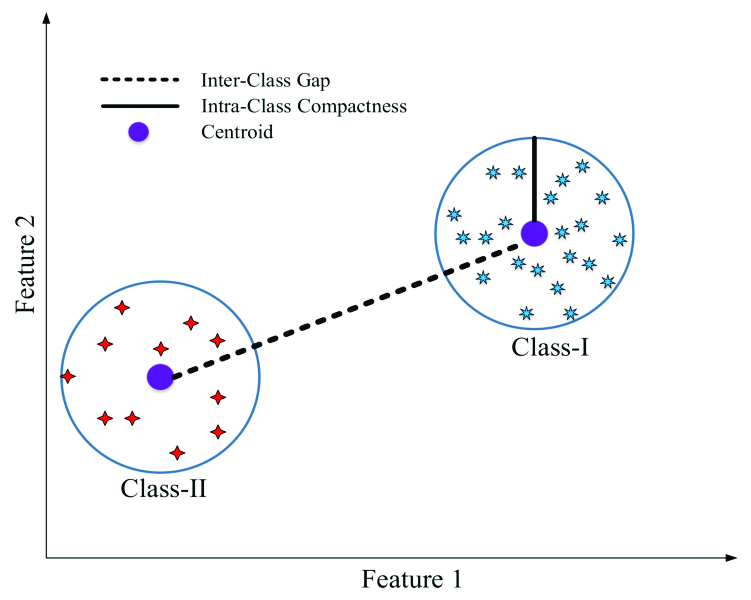

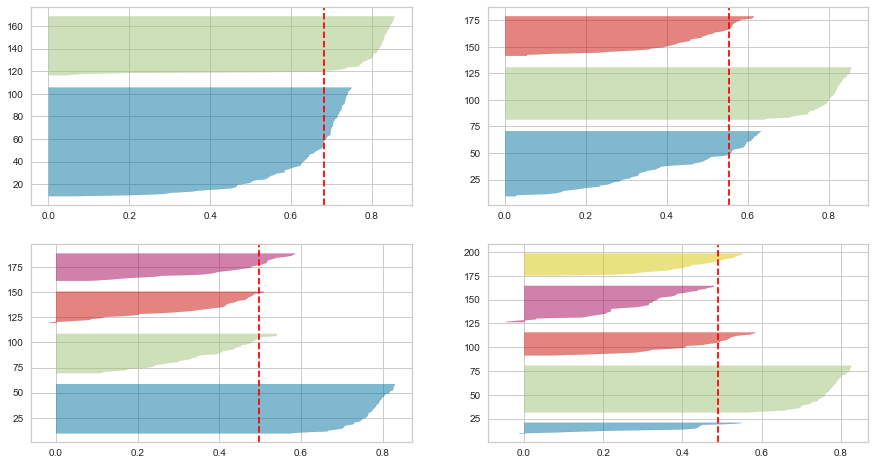

In [3]:
# Load the IRIS dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target
  
fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    '''
    Create KMeans instances for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X)

In [4]:
import plotly.graph_objects as go  #for 3D plot

## K-means using k = 3
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

## 3D plot 
Scene = dict(xaxis = dict(title  = 'sepal_length -->'),yaxis = dict(title  = 'sepal_width--->'),zaxis = dict(title  = 'petal_length-->'))

labels = kmeans.labels_
trace = go.Scatter3d(x=X[:, 0], y=X[:, 1], z=X[:, 2], mode='markers',marker=dict(color = labels, size= 10, line=dict(color= 'black',width = 10)))
layout = go.Layout(margin=dict(l=0,r=0),scene = Scene,height = 800,width = 800)
data = [trace]
fig = go.Figure(data = data, layout = layout)
fig.show()

# Silhouette score: 
## Range: 
ranges from -1 to 1, with values closer to 1 indicating that the sample is well matched to its own cluster and poorly matched to other clusters, and values closer to 1 indicating that the sample is poorly matched to its own cluster and well matched to other clusters.
## Interpretation: 
A high score indicates that the clusters in the data set are well defined and distinct, while a low score indicates that the clusters are poorly defined or overlap.
## Sensitivity: 
There is sensitivity to the number of clusters and the shape of the clusters. It is generally higher for datasets with well-defined and distinct clusters and lower for datasets with overlapping or poorly defined clusters.
## Limitations: 
Score is sensitive to feature scale and may not be reliable for datasets with highly skewed or outlier distributions. It is also sensitive to the choice of distance measure and clustering algorithm, so it is important to take these factors into account.

Further reading: 
https://r-h-fisch.github.io/index.html